Лабораторная работа №1
=====
Поиск экстремума функции одной переменной с помощью генетических алгоритмов с бинарным представлением особей
=====

## Цель задания
Знакомство с основными понятиями теории генетических алгоритмов. Изучение и реализация классического простого генетического алгоритма с ис- пользованием представления решений в форме бинарных строк. Классические генетические операторы, кроссинговер и мутация для бинарных особей.

## Постановка задачи
Дана функция одной переменной y = f(t). Найти экстремум данной функ- ции на отрезке t ε [t0,t1] с помощью генетического алгоритма с бинарным пред- ставлением особей. Иллюстрировать графически динамику поиска экстремума. Программную реализацию выполнить в системе Matlab в виде программного m- модуля.

#### Вариант 2. Найти минимум функции f(t)=(1,3t+1,9)cos(1,1πt-1,5), tε[-6,6].

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# t in [a, b]
a = -6
b = 6
f = lambda t: (1.3*t + 1.9)*(np.cos(1.1 * np.pi * t - 1.5))

#### Функция создания начальной популяции.

In [6]:
def create_population(low , high, size):
    p = np.random.uniform(low, high, size)
    return p

#### Реализация функции репродукции

In [197]:
def selection(population, fitness):
    size = population.size
    f_vals = fitness(population)
    f_vals = -f_vals + np.max(f_vals)
    sum = np.sum(f_vals)
    if abs(sum) - 1e-3 < 0:
        return population

    p_vals = f_vals / sum
    num_copies = np.round(p_vals * size).astype(int)

    offsprings = np.repeat(population, num_copies)
    if offsprings.size > size:
        offsprings = offsprings[:size]
    if offsprings.size < size:
        i = np.argmax(num_copies)
        app = np.repeat(population[i], size - offsprings.size)
        offsprings = np.concatenate((offsprings, app))

    return offsprings

#### Реализация функций преобразования действительных значений в бинарный формат

In [10]:
def to_bin(x, a, c, size=4):
    segment = np.round((x - a) * (2 ** size - 1) / (c - a)).astype(int)
    b = format(segment, f'0{size}b')
    return b

def from_bin(b, a, c, size=4):
    segment = int(b, 2)
    x = a + segment * (c - a) / (2 ** size - 1)
    return x

#### Реализация функции кроссинговера

In [198]:
def crossing_over(population, to_bin, from_bin, pc=0.5):
    recombined = []
    for p in population:
        if np.random.random_sample(1)[0] > pc:
            continue

        i = np.random.randint(0, population.size, 1)[0]
        p1 = to_bin(p)
        p2 = to_bin(population[i])
        n = len(p1)
        k = np.random.randint(1, n-1, 1)[0]
        r1 = p1[:k] + p2[k:]
        r2 = p2[:k] + p1[k:]
        recombined.append(from_bin(r1))
        recombined.append(from_bin(r2))

    recombined = np.array(recombined)
    return recombined

#### Реализация функции мутации

In [44]:
def mutation(population, to_bin, from_bin, mp=0.1):
    for p in population:
        if np.random.random_sample(1)[0] > mp:
            continue

        i = np.random.randint(0, population.size, 1)[0]
        x = population[i]
        b = to_bin(x)
        k = np.random.randint(0, len(b), 1)[0]
        b = list(b)
        b[k] = '0' if b[k] == '1' else '1'
        x = from_bin(''.join(b))
        population[i] = x

    return population

#### Реализация функции находящей минимум с помощью генетического алгоритма.

In [199]:
def reduction(population, fitness, size):
    f_vals = fitness(population)
    population = population[f_vals.argsort()]
    return population[:size]

In [211]:
def run_ga(f, a, b, size, num_genes, cop, mp, num_iterations=10):
    p = create_population(a, b, size)
    fitness = f(p)
    populations = [p]
    populations_min = [(np.min(fitness), p[fitness.argmin()])]
    populations_mean = [np.mean(fitness)]
    convert_to_bin = lambda x: to_bin(x, a, b, num_genes)
    convert_from_bin = lambda x: from_bin(x, a, b, num_genes)
    for i in range(num_iterations):
        parents = selection(p, f)
        offsprings = crossing_over(parents, convert_to_bin, convert_from_bin, cop)
        offsprings = mutation(offsprings, convert_to_bin, convert_from_bin, mp)
        p = reduction(np.concatenate((p, offsprings)), f, size)
        populations.append(p)
        fitness = f(p)
        populations_min.append((np.min(fitness), p[fitness.argmin()]))
        populations_mean.append(np.mean(fitness))

    return populations, populations_min, populations_mean

In [217]:
def plot_func(f, start, stop, population=None, min=None):
    x_range = np.linspace(start, stop, 200)
    f_vals = f(x_range)
    legend = ['F(t)']
    plt.figure()
    plt.plot(x_range, f_vals)
    if population is not None:
        plt.plot(population, f(population), 'rx')
        legend.append('Population')
    if min is not None:
        plt.plot(min[1], min[0], 'x', color='black')
        legend.append('Min in population')

    plt.legend(legend)

    plt.show()

#### Зададим основные параметры алгоритма

In [213]:
population_size = 20
num_genes = 16
num_epoch = 10
crossing_over_probability = 0.5
mutation_probability = 0.1

In [222]:
populations, mins, means = run_ga(f, a, b, population_size, num_genes, crossing_over_probability, mutation_probability, num_epoch)
print(f'Result of minimazing F(t) = {mins[-1][0]}, t = {mins[-1][1]}')

Result of minimazing F(t) = -8.381296469629381, t = 4.9956511787594415


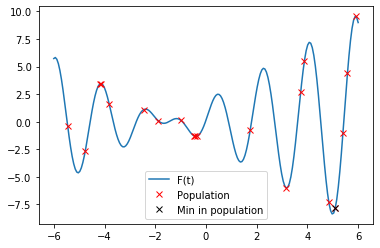

In [223]:
plot_func(f, a, b, populations[0], mins[0])

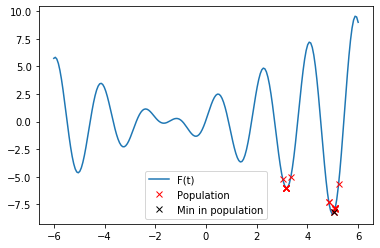

In [224]:
plot_func(f, a, b, populations[2], mins[2])

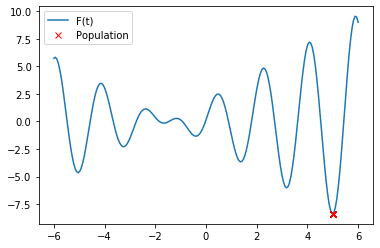

In [225]:
plot_func(f, a, b, populations[-1])

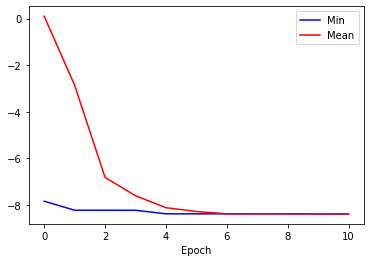

In [226]:
minsp = [m[0] for m in mins]
plt.figure()
plt.plot(range(num_epoch+1), minsp, c='b')
plt.plot(range(num_epoch+1), means, c='r')
plt.xlabel('Epoch')
plt.legend(('Min', 'Mean'))
plt.show()

## Вывод
В данной работе реализован алгоритм нахождения минимума функции одной переменной с помощью генетического алгоритма. Для создания начальной популяции используется метод дробовика, был использован пропроциональный отбор родителей, одноточный кроссинговер и одноточная мутация. Для представления вещественных решений используется метод разбития исходной области решений на отрезки.